# Projeto 1 - Ciência dos Dados

Nome: Giovanni Rozatti

Nome: Gabriel Parfan Guimarães

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\OneDrive - Insper - Institudo de Ensino e Pesquisa\Desktop\Insper\2°Semestre DP\CDados\CD2020-Projeto1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

___
## Classificador automático de sentimento


- Produto escolhido: Atila Iamariano (@oatila)
- Descrição do Produto: 

    Atila Iamarino (1984)é um biólogo e pesquisador brasileiro formado em microbiologia, possuindo também doutorado em virologia, notório por seu trabalho no canal de YouTube denominado "Nerdologia",que possui mais de 2 milhões de inscritos e integra o grupo Jovem Nerd, uma plataforma digital de cultura pop, jogos eletrônicos e conteúdo jovem. -Wikipedia  
    
    Átila já era bastante conhecido por seu canal no Youtube e por sua participação em podcasts, principalment do podcast Jovem Nerd) popularidade de Atila cresceu bastante atualmente, principalmente por conta do COVID-19, chegando a transmitir lives diárias, para falar da situação atual, cuidados preventivos e fazendo predições com uso de estatísticas e dados sobre como a situação se desdobraria, chegando a até mesmo a participar de um Programa do Roda-Viva `https://www.youtube.com/watch?v=s00BzYazxvU` - Observação de Giovanni Rozatti
    ________________________________________________________________________________________________

- Método de classificação: 
foram realizados 2 níveis de classificação, no primeiro foi classificada a relêvancia da mensagem, e no segundo era avaliado o teor da mensagem
___

Nível 1 de classificação:

- Relevante: Tweets que contribuiriam com o processo de classificação por estarem relacionados ou ao tema discutido ou a algo próximo e/ou que continham elementos possiveis para que fosse feita a classificação do teor de sua mensagem  
    
- Irrelevante: Tweets que não contribuiam com o processo de classificação e/ou não podiam ser classificados por falta de elementos que possibilitassem isso,como por exemplo: "@atila que hrs são" (esse tweet de fato apareeu na base de dados)  
    <font color=#DD4040>**Observação**: mensagens curtas demais com palavras inéditas ou menos frequentes também caem nessa categoria</font>
    
- Opinião Política: Tweets que continham mensagens de teor político e/ou próximos a política explícitos, como por exemplo, os termos que apareceram com recorrencia considerável : "bolsominion" e "comunista"
    
Nesse nível as mensagens foram separadas nas três categorias acima, com o objetivo de fazer uma refiltragem dos tweets obtidos, originalmente seriam apenas duas categorias (Relevante e Irrelevante), no entanto ao decorrer do processo foi vista a necessidade de estender ainda mais esse escopo, isso possibilitará a classificação das mensagens excluindo as irrelevantes e as que possuem teor político, assim como a classificação excluindo apenas as irrelevantes nos fornecendo como resultado a resposta da pergunta:
"Quanto as mensagens com teor político influenciam de fato na classificação?"
___

Nível 2 de classificação:


- Classificações atribuidas e o que levou a atribuirmos fraases a elas:

    - Show and tell: Tweets que, traziam perguntas, questionamentos, pesquisas, dados, materiais de referencia e fontes para embasamentos e reflexões, em geral continham teor similar ao dos exemplos a seguir: "@oatila @maisalguem vocês viram isso?", "@atila, o que voce acha de...?"  Eram usados para ou apresentar o porque de concordar ou discordar, não necessáriamente do biólogo, mas de quem era citado através do @ junto com ele 
    
    - Apoia/concorda: Tweets que em geral dizem: "@oatila parabens pelo trabalho", "@oatila bacana essa info que você apresentou"  
    
    - Discorda/Desacredita: Tweets que em geral fazem críticas ao trabalho feito, ou a uma posição que foi tomada, não necessariamente apresentando embasamento sobre o porque da crítica  
    
    - Mensagem de ódio:Tweets que apresentam mensagens ofensivas a esmo, (não necessáriamente ao biologo, mas ainda assim perinentes ao trabalho como será visto mais adiante nesse Notebook)*  
    
Nesse nível as mensagens foram separadas nas quatro categorias acima, com o objetivo de própriamente classificá-las para que pudessem passar pelo processo de slicing e classificação de palavras
A classificação nessa parte foi feita de acordo com o seguinte método:   
1. Se possível classificar como o classifiador Naive Bayes final do projeto faria, isso é analisar as palavras individualmente tentando prever o resultado da classificação.    
2. Se não for possível classificar via método anterior classificar a frase como um todo de acordo com o teor que contém
3. Se não for possível classificar de acordo com método anterior, marcar tweet como Irrelevante no nível de classificação 1**

  $*$ Muitas das mensagens de ódio não estavam sendo direcionadas ao Biólogo mas a principalmente à @embaixadadachina e @mariuzakrause  
  $**$Não hoveram casos em que o método 3 tenha sido utilizado

   - @embaixadadachina:Trazendo a China para perto de você! Conta oficial da Embaixada da República Popular da China na República Federativa do Brasil. - bio no twitter da embaixada  
   
        Foi alvo de várias mensagens de ódio falando principalmente:sobre sistema político-sócio-econômico chinês, e acusações de culpa pela disseminação do COVID-19, por conta de supostas alerações em estatísticas e por o vírus ser "uma criação deles"; A motivação dessas mensagens foi que o biólogo ter utilizado de pesquisas fornecidas pelo país  

   - @mariuzakrause: Direita, conservadora, bolsonariana, Jacobina, gado do Bolsonaro, Advogada nas horas vagas, petistas desapareçam! - bio no twitter de Mariuza  
         
        Foi alvo de várias mensagens de ódio falando principalmente:sobre sua oientação política, autenticidade de sua formação em direito; A motivação dessas mensagens foi que mariuza discordou publiamente sobre o posicionamento do biólogo em relação a quarentena, chegando a difamá-lo em relação aos resultados obtidos através de algumas pesquisas dizendo que Átila estaria "passando vergonha"  
        


___
<font color=#EF3333> - **Observação: a estrutura do código a seguir é similar ao do usado no meu trabalho no semestre anterior (perfil no git: VonIgnia), e pode ser visto em: `https://github.com/carolinechaim/Projeto_2/blob/master/NaiveBayes teste 1.ipynb` mais especificamente nos commits "Planilha teste rodando no Jupyter" e "Planilha teste rodando os classificadores NaiveBayes".**</font>

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [3]:
#Lê as planilhas de treinamento
training = pd.read_excel("@oatila1.xlsx",sheet_name = 'Treinamento', index = False)

In [4]:
#A função elimina tweets considerados como irrlevantes para o classificador

#A variável Elimina recebe uma string pertencente a categoria Nivel de Relevancia 
#("Relevante", "Irrelevante" e "Opinião Política")

def Elimina_por_nível_de_relevância(train,Elimina):
    for i in range(0, len(Elimina)):
        train.drop(train[ train['Nível de relevância'] == Elimina[i].rstrip()].index, inplace=True)
    return train

#A função calcula as frequências relativas de cada categoria
def Calcula_frequencias_relativas(train,relative):
#Calcula as frequências relativas de cada categoria dentre o que foi considerado Relevante
    probs = train["Opinião Pública"].value_counts(relative)
    return probs

In [5]:
#lista de categorias a serem eliminadas
Relev_Eliminate = ['Irrelevante']

#chamando por outro nome para evitar o re-run de training /n
#caso contrário training assumiria o valor do return da /n
#função o que deixaria tudo mais complicado

treino = Elimina_por_nível_de_relevância (training,Relev_Eliminate)
freq_relativas = Calcula_frequencias_relativas(treino,True)

In [6]:
prob_apoio_a_priori = freq_relativas[0]
prob_mostra_a_priori = freq_relativas[1]
prob_odeia_a_priori = freq_relativas[2]
prob_discorda_a_priori = freq_relativas[3]

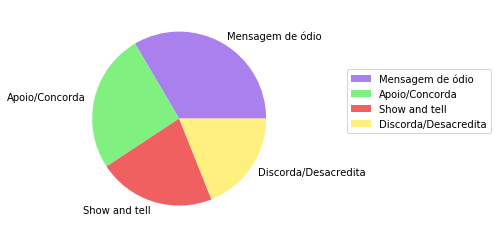

In [7]:
#Como facilita a vizualização e como engenheiros gostam aqui temos um gráfico
plt.pie(treino["Opinião Pública"].value_counts(),
    labels=treino["Opinião Pública"].value_counts().index, 
    colors=["#AA80EE","#80F080","#F06060","#FFF080"]);
plt.legend(bbox_to_anchor=(1.25, 0.75,0.25,0))
plt.show()

Separa todas as palavras que aparecem em cada categoria no formato de uma Série

In [8]:
def Separa_palavras_em_series(train,lista_classificações):
    series_categories=[]
    for i in range(0,len(lista_classificações)):
        category = train[train["Opinião Pública"] == lista_classificações[i]]
        category = category["Treinamento"].str.cat().split()
        series_categories.append(pd.Series(category))
#====================================================================================================== 
    #-------------------------------------------------
      ### tentativa (falha) de deixar o código genérico e portanto aplicável a qq objeto de estudo /n
      ### para qq número de ccategorias, quaisquer que fosse sua ordem:
    #------------\/código das tentativas\/--------------    
        #for i in range(0,len(series_categories)):
           # setattr('Series'+str(lista_classificações[i], 'foobar', series_categories[i])
           # eval('Series'+str(lista_classificações[i]))series_categories[i]
    #-------------------------------------------------
#======================================================================================================    
    return series_categories
lista_classificações = treino["Opinião Pública"].value_counts(sort=False).index.tolist()
series_categorias = Separa_palavras_em_series(treino,lista_classificações) #Uma lista de 4 series;
series_categorias;

In [21]:
#isso só pode ser feito quando Sort=False e quando a ordem,/n
#é conhecida caso contrário pode criar erros no classificador
series_Apoia    = pd.Series(series_categorias[0])
series_Discorda = pd.Series(series_categorias[1])
series_Odeia    = pd.Series(series_categorias[2])
series_Mostra   = pd.Series(series_categorias[3])
series_Apoia

0                @oatila
1             exatamente
2                isso!!!
3                      e
4                      o
5                   povo
6                    não
7                entende
8       🤯😰@mariuzakrause
9              @maozinbr
10               @oatila
11               estudar
12        mais???@oatila
13        @mariuzakrause
14                 cara,
15                     n
16                   cai
17                    na
18            provocação
19                 dessa
20               galera,
21                 estão
22              montando
23                   uma
24             narrativa
25                    em
26                  cima
27                    de
28                   vc,
29                  jaja
              ...       
1532                 que
1533                 ele
1534                 não
1535               possa
1536              errar,
1537        [...]@oatila
1538               lenha
1539                 nos
1540                 eua


Criando uma "tabela" com a probabilidade individual de todas as palavras aparecerem em uma dada categoria
("Dado que a opinião é essa qual a probabilidade dessa palavra aparecer?")

In [24]:
tabela_Apoia    = series_Apoia.value_counts(True)
tabela_Discorda = series_Discorda.value_counts(True)
tabela_Odeia    = series_Odeia.value_counts(True)
tabela_Mostra   = series_Mostra.value_counts(True)
tabela_Apoia 
#esse resultado também varia com motivo oculto, acredito que o problema de \n
#variação do fim do código se inicia no ponto de primeira variação que pode \n
#anteceder esse, mas por enquanto essa é a hipótese que foi estabelecida pra debug:
#uma célula no incio tem variação e a variação se propaga até o resultado final
#suposta solução: "subir" e ir dando re-run em tudo até achar a primeira variação

que                       0.033931
o                         0.028809
@oatila                   0.026248
e                         0.026248
de                        0.023688
a                         0.021127
é                         0.018566
não                       0.016645
uma                       0.013444
pra                       0.011524
do                        0.009603
se                        0.007682
da                        0.007682
com                       0.007682
tem                       0.007042
por                       0.007042
na                        0.007042
eu                        0.006402
você                      0.006402
um                        0.005762
mais                      0.005762
mas                       0.005762
isso                      0.005762
em                        0.005122
seu                       0.005122
como                      0.004481
ele                       0.004481
as                        0.004481
foi                 

"Raptando" a função de limpeza de pontuações e sinais do notebook da aula 7:

In [11]:
import re 
def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    #punctuation = '[!-.:?;")(]' # Note que os sinais [] são delimitadores de um conjunto.
    punctuation ="['(',')','"',"'",',','.',':']"
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

Criando uma função que faz o calculo da frase pertencer a uma categoria utilizando a fórmula de bayes

In [12]:
def classificador_de_palavras_multinomial_naive_bayes(tweet):  
    
    prob_Apoia = 1
    prob_Discorda = 1
    prob_Odeia = 1
    prob_Mostra = 1
      
    lista_palavras = cleanup(tweet).split()
    for palavra in lista_palavras:

    #===\/ O que o classificador faz quanto a palavras inéditas \/===
    #Palavras novas não alteram a classificação atual, no entanto um tweet
    #composto exclusivamente por palavras novas "quebraria" a classificação
        #---------------------------------------------------
        if palavra in tabela_Apoia.index:
            prob_palavra_Apoia = tabela_Apoia[palavra]
        else:
            prob_palavra_Apoia = 1
        #---------------------------------------------------    
        if palavra in tabela_Discorda.index:
            prob_palavra_Discorda = tabela_Discorda[palavra]
        else:
            prob_palavra_Discorda = 1
        #---------------------------------------------------
        if palavra in tabela_Odeia.index:
            prob_palavra_Odeia = tabela_Odeia[palavra]
        else:
            prob_palavra_Odeia = 1
        #---------------------------------------------------
        if palavra in tabela_Mostra.index:
            prob_palavra_Mostra = tabela_Mostra[palavra]
        else:
            prob_palavra_Mostra = 1
        #---------------------------------------------------
    #===========================================================

        prob_Apoia *= prob_palavra_Apoia
        prob_Discorda *= prob_palavra_Discorda
        prob_Odeia *= prob_palavra_Odeia
        prob_Mostra *= prob_palavra_Mostra
        
    #=========================================================== 
    #Se não houver alteração no valor inicial (1) é porque não /n
    # foram detectadas nenhuma  pertencente áquela categoria
    #Reseta a probabilidade da categoria.
    # (transformar em função??????????????)

        #---------------------------------------------------
        if prob_Apoia == 1:
            prob_Apoia = 0
        #---------------------------------------------------
        if prob_Discorda == 1:
            prob_Discorda = 0
        #---------------------------------------------------
        if prob_Odeia == 1:
            prob_Odeia = 0
        #---------------------------------------------------
        if prob_Mostra == 1:
            prob_Mostra = 0
        #---------------------------------------------------
        
        prob_Apoia *= prob_apoio_a_priori
        prob_Discorda *= prob_discorda_a_priori
        prob_Odeia *= prob_odeia_a_priori
        prob_Mostra *= prob_mostra_a_priori
            
        if (prob_Apoia > prob_Discorda) and (prob_Apoia > prob_Mostra) and (prob_Apoia > prob_Odeia):
            return "Apoio/Concorda"
        elif (prob_Discorda > prob_Apoia) and (prob_Discorda > prob_Mostra) and (prob_Discorda > prob_Odeia):
            return "Discorda/Desacredita"
        elif (prob_Odeia > prob_Apoia) and (prob_Odeia > prob_Discorda) and (prob_Odeia > prob_Mostra):
            return "Mensagem de ódio"
        elif (prob_Mostra > prob_Apoia) and (prob_Mostra > prob_Discorda) and (prob_Mostra > prob_Odeia):
            return "Show and tell"

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

leitura da planilha para testes com o classificador

In [13]:
test = pd.read_excel("@oatila1.xlsx",sheet_name = 'Teste', index = False).set_index("Teste")
target = test["Target"]
test = test.drop(columns=["Target"])
lista_tweets = list(test.index)

In [14]:
#Célula de debugging
#Se o resultado da classificação está variando o resultado para frases extraídas também /n
#teria a tendencia de variar

frases_extraídas = pd.read_excel("@oatila1.xlsx",sheet_name = 'Teste', index = False).set_index("Teste").head(20)
frases_extraídas = frases_extraídas.drop(columns=["Target"])
tweets_debug = list(frases_extraídas.index)
for tweet in tweets_debug:
    frases_extraídas.loc[tweet,"Classificação"] = classificador_de_palavras_multinomial_naive_bayes(tweet)
frases_extraídas.Classificação.value_counts()

Show and tell       16
Mensagem de ódio     2
Name: Classificação, dtype: int64

In [15]:
for tweet in lista_tweets:
    test.loc[tweet,"Classificação"] = classificador_de_palavras_multinomial_naive_bayes(tweet)
test;

#os problemas relatados no notebbok Projeto1_Classificador_layout_Relatório_de_erros foram eliminados /n
#nesse notebook no entanto tweets muito curtos (baixo número de palavras), com strings inéditas/n
#(geralmente variações de kkk com mais ou menos caracteres) e links não puderam ser classificados/n
#felizmente eles são uma minoria e portanto a eliminação desses não acarreta em significativos impactos/n
#para o classsificador, no entanto há de fato um problema significativo nesse classificador: /n
#ele não classifica NENHUMA mwnsagem como "Show and Tell" o que é estranho, visto que esses /n
#representam cerca de 25% dos tweet classificados ou como não irrelevantes./n
#após análise sobre isso, percebi que não existem inconsistencias no código e que portanto/n
#não faz sentido obter esse resultado

In [16]:
acertos = 0
for i in range(len(test)):
        if test.Classificação[i] == target[i]:
            acertos+=1
erros = len(test) - acertos

In [17]:
test.Classificação.value_counts()

Show and tell           215
Mensagem de ódio         26
Discorda/Desacredita     15
Apoio/Concorda           15
Name: Classificação, dtype: int64

In [18]:
target.value_counts()

Mensagem de ódio        176
Apoio/Concorda           82
Discorda/Desacredita     78
Show and tell            62
Name: Target, dtype: int64

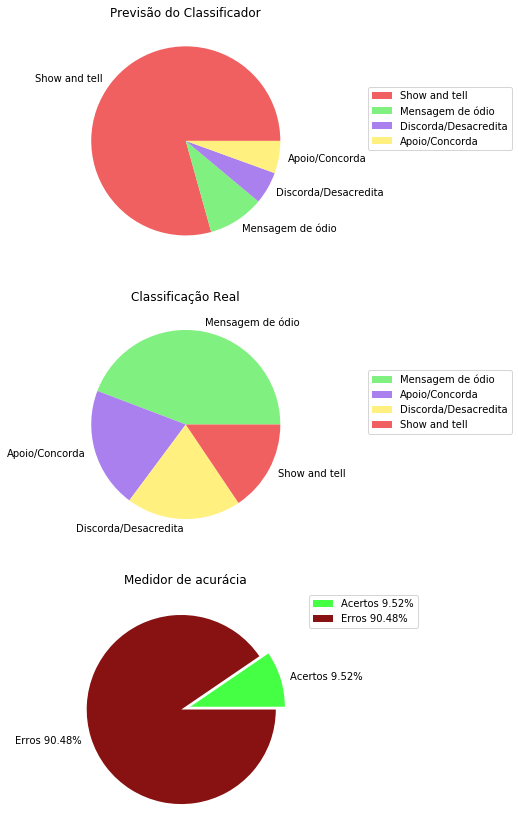

In [19]:
plt.figure(figsize=(60,20))

plt.subplot(4, 1, 1)
plt.title("Previsão do Classificador")
plt.pie(test.Classificação.value_counts(),
    labels=test.Classificação.value_counts().index, 
    colors=["#F06060","#80F080","#AA80EE","#FFF080"]);
plt.legend(bbox_to_anchor=(1.25, 0.75,0.25,0))
#---------------------------

plt.subplot(4, 1, 2)
plt.title("Classificação Real")
plt.pie(target.value_counts(),
    labels=target.value_counts().index, 
    colors=["#80F080","#AA80EE","#FFF080","#F06060"]);
plt.legend(bbox_to_anchor=(1.25, 0.75,0.25,0))
#---------------------------

plt.subplot(4, 1, 3)
plt.title("Medidor de acurácia")
plt.pie([acertos,erros],
    explode=(0.05,0.05),
    labels=['Acertos {0:.2f}%'.format(acertos*100/len(test)) ,'Erros {0:.2f}%'.format(erros*100/len(test))], 
    colors=["#44FF44","#881111"]);
plt.legend(bbox_to_anchor=(1, 1,0.25,0))

plt.show()

___
### Diferentes aplicações para um classificador NaiveBayes:  

- Dado que os clientes de uma lanchonete gostam de uma determinada bebida e gostam de um determinado combo com essa bebida e lanche, o classificador Naive Bayes poderia ser utilizado nesse exemplo para determinar a probabilidade dos clientes gostarem só do lanche  
- Um classificador Naive Bayes poderia ser utilizado para classificar mensagens de e-mail como spam ou não spam
- Basicamente quaisquer dois ou mais eventos com probabilidades independentes de ocorrer (em relação uns aos outro) e que possam acontecer juntos (simultanea ou consecutivamente) são passiveis do uso de um classificador Naive Bayes para determinar a probabilidade de um evento ocorrer dado que são conhecidos apenas:
    - a probabilidade de um evento ocorrer junto com outro(que se deseja determinar) $P(A∩B)$  ou a probabbilidade do evento B $P(B)$ ocorrer
    - a probabilidade de um evento(A) ocorrer dado que outro evento(B) ocorre $P(A\mid B) = \frac{P(A\cap B)}{P(B)}$  
    - a probabilidade de um evento(B) ocorrer dado que outro evento(A) ocorre $P(B\mid A)$  

Com isso é possivel determinar $P(A)$

___
### Por que não é viável fazer o classificador gerar amostras de treinamento?

Supondo o caso de um projeto perfeito com classificação de 100% de acurácia comece a fazer retroalimentação (começar a gerar amostras de treinamento para si mesmo), caso ele cometa um pequeno erro (o motivo provável disso seria a probabilidade relativa de uma palavra crescer a ponto de gerar um viés, ao exemplo de um tweet com a repetição de uma única string várias vezes até atingir o número maximo de caracteres permitidos pelo twitter), a classificação vai perder acuracia e cada vez que ele repetir esse processo estará sujeito a perder cada vez mais. Se até mesmo sob as circunstancias anteriores (supostamente ideais) não é recomendável fazer retroalimentação, não seria viável para nenhum outro classificador. 

Para que o classificador possa gerar amostras de treinamento é necessário que em algum ponto essas passem por um processo de classificação não automatizado (não há garantia de que isso não irá piorar a classificação, mas provavelmente piorará menos que caso fosse feito pelo próprio classificador)

___
### Outras propostas de limpeza:
- Eliminação de retweets (foi feita e pode ser vista no Notebook "Projeto_1_Obtenção_dos_tweets")
- Remoção de strings iniciadas com @
- Separação de strings com @ no meio:
    - exemplo: PréArroba@PósArroba -> PréArroba @PósArroba  
    - E seguindo a regra do item anterior "@PósArroba" por começar com "@" seria excluido
- não classificar e excluir tweets com uma contagem de palavras inferior a determinado valor, por exemplo: 7 palavras*


$*$ **Contabilizadas após remoção de strings que começam com @** 

___
### Concluindo
Versão 1  (o objeto de clasificação ainda era Cinemark, mas como os erros daquela versão poderiam se repetir nessa e serviram para reflexões além de elaborações de uma maneira de "consertá-los".)
22/03- o código roda mas claramente a classificação está com imperfeições isso pode se dar por:
 - erros de contabilização na fórmula do NaiveBayes
 - erros na clasificação do excel
 - certas palavras possuirem um viés deterministico mais forte para um dos lados (no caso a Opinião Positiva) 
 
Versão 2 houve um grande avanço quando comparado à versão anterior, agora o código faz classificação multinomial e não mais binária, possui um target para comparar a planilha de testes com, plota gráficos para as categorias classificadas para as categorias existentes no target e para o número de acertos em relação ao total de mensagens classificadas, ainda assim existem problemas na classificação:
 - o classificador não consegue classificar na categoria "Show and tell"
 - frases com menos de 10 palavras estão mais sujeitas a não serem classificadas corretamente.
 - parte da limpeza não pode ser realizada, isso está justificado no Notebook "Relatório de Erros"$*$
    $*$ mais especificamente a parte que fazia a limpeza de \n e de @PerfilOuPaginaNoTwitter
    
Versão 3 Foi descoberto que o resultado do classificador está variando e varia sem um motivo específico detectado, como última mudança até a versão final, só resta outra depuração pra tentar compreender o motivo de tamanha variação, provavelmente o mesmo do "Show and Tell" não ser clssificado, no entanto esse comportamento não faz sentido. A conclusão dessa versão é que o classificador não poderia ser aplicado em analise de dados devido ao resultado flutuar
___________________________________________________________________________________________________________
<font color=#FF0101> Nota do developer:A versão 3 e 4 deveriam ter sido separadas por um commit </font>  
As únicas mudanças foram:  

Fora da função Multinomial_Naive_bayes_classifier:  
   - criação das variaveis prob_a_priori na célula 6 do código  
   
Dentro da função Multinomial_Naive_bayes_classifier:  
   - Remoção de "prob_Apoia = 1"(e de outras de mesma estrutura)  que foram movidas para o lado de fora do for e que portanto não são mais reiniciadas a cada palvra
   - Multiplicação por variaveis prob_a_priori criadas na célula 6 do código
___________________________________________________________________________________________________________
Versão 4 O classificador continua a flutuar mas passou a exibir show and tell portanto o motivo de não exibição e de aleatoriedade não são os mesmos, e ao ser comparado com o target a classificação está ruim, além disso não foi possível determinar qual o motivo do resultado randomico, com isso o classificador continua não sendo totalmente aplicável em análise de dados  
PS: Agora percebi que o target também está variando, e isso é ainda mais sem sentido e inconsistente  
PPS: A variação no target é a troca da posição de elementos, ou seja: os valores são os mesmos no entanto eles estão permutando indexes entre si

Versão 5: 
- A variação do target foi consertada, através da remoção de todos os (sort=False) desnecessários

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* <font color=#AF22AF> Limpar: \n, :, ", ', (, ), etc SEM remover emojis  </font>*
* <font color=#FF0101> Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis </font>
* <font color=#0FCF22> Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação </font>
* <font color=#0FCF22> Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B) </font>
* <font color=#0FCF22> Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento </font>
* <font color=#0FCF22> Propor diferentes cenários para Naïve Bayes fora do contexto do projeto </font>
* <font color=#0FCF22> Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa) </font>
* <font color=#FF0101> Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados </font>
____
Legenda:
- <font color=#0FCF22>Verde</font>: feito e concluído
- <font color=#AF22AF>Roxo</font>: feito parcialmente
- <font color=#FF0101>Vermelho</font>: não adicionado

**$*$ Só faltou o \n (quebras de linha)**

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

Esse notebbok foi por um breve periodo de tempo chamado de "Projeto1_Classificador_layout-Depuração", após a depuração ser realizada com sucesso ele se tornou o "Projeto1_Classificador_layout_final" e o antigo "Projeto1_Classificador_layout" se tornou "Projeto1_Classificador_layout_Relatório_de_Erros"